# 兩類流量分類

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.utils import to_categorical

%matplotlib inline

/opt/homebrew/Caskroom/miniforge/base/envs/env_tensorflow/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Init Plugin
Init Graph Optimizer
Init Kernel


## 資料前處理

In [2]:
flow1 = pd.read_csv('./flow1_v1.csv', header=None)
flow2 = pd.read_csv('./flow2_v1.csv', header=None)
print(flow1.shape)
print(flow2.shape)

(2502, 77)
(2727, 77)


In [3]:
flow1.head()

,0,1,2,3,4,5,6,7,8,9,...,67,68,69,70,71,72,73,74,75,76
0,250840,6,7,1079,201,537,0,179.833333,260.004167,137,...,3,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,27166,2,1,31,0,31,0,15.500000,21.920310,0,...,0,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,11626,2,0,85,0,85,0,42.500000,60.104076,0,...,0,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,16,2,0,0,0,0,0,0.000000,0.000000,0,...,0,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,37180,1,1,0,0,0,0,0.000000,0.000000,0,...,0,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
flow2.head()

,0,1,2,3,4,5,6,7,8,9,...,67,68,69,70,71,72,73,74,75,76
0,16560,2,0,85,0,85,0,42.5,60.104076,0,...,0,32,0.0,0.0,0,0,0.0,0.0,0.0,0.0
1,156,2,0,0,0,0,0,0.0,0.000000,0,...,0,32,0.0,0.0,0,0,0.0,0.0,0.0,0.0
2,37181,1,1,0,0,0,0,0.0,0.000000,0,...,0,32,0.0,0.0,0,0,0.0,0.0,0.0,0.0
3,2496023,1,3,31,31,31,31,31.0,0.000000,31,...,0,32,0.0,0.0,0,0,0.0,0.0,0.0,0.0
4,52,2,0,0,0,0,0,0.0,0.000000,0,...,0,32,0.0,0.0,0,0,0.0,0.0,0.0,0.0


In [5]:
flow1.insert(77,column="label",value=0)
flow1.head()

,0,1,2,3,4,5,6,7,8,9,...,68,69,70,71,72,73,74,75,76,label
0,250840,6,7,1079,201,537,0,179.833333,260.004167,137,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,27166,2,1,31,0,31,0,15.500000,21.920310,0,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,11626,2,0,85,0,85,0,42.500000,60.104076,0,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,16,2,0,0,0,0,0,0.000000,0.000000,0,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,37180,1,1,0,0,0,0,0.000000,0.000000,0,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [6]:
flow2.insert(77,column='label',value=1)
flow2.head()

,0,1,2,3,4,5,6,7,8,9,...,68,69,70,71,72,73,74,75,76,label
0,16560,2,0,85,0,85,0,42.5,60.104076,0,...,32,0.0,0.0,0,0,0.0,0.0,0.0,0.0,1
1,156,2,0,0,0,0,0,0.0,0.000000,0,...,32,0.0,0.0,0,0,0.0,0.0,0.0,0.0,1
2,37181,1,1,0,0,0,0,0.0,0.000000,0,...,32,0.0,0.0,0,0,0.0,0.0,0.0,0.0,1
3,2496023,1,3,31,31,31,31,31.0,0.000000,31,...,32,0.0,0.0,0,0,0.0,0.0,0.0,0.0,1
4,52,2,0,0,0,0,0,0.0,0.000000,0,...,32,0.0,0.0,0,0,0.0,0.0,0.0,0.0,1


In [7]:
data = flow1.append(flow2,ignore_index=True)
print(data.shape)
data.isna().sum()

(5229, 78)


0        0
1        0
2        0
3        0
4        0
        ..
73       0
74       0
75       0
76       0
label    0
Length: 78, dtype: int64

In [8]:
y_data = data['label']
y_data = np.array(y_data)
print(y_data)

[0 0 0 ... 1 1 1]


In [9]:
x_data = data.drop(columns=['label'])
x_data = np.array(x_data)
x_data

array([[2.5084000e+05, 6.0000000e+00, 7.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [2.7166000e+04, 2.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.1626000e+04, 2.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [5.1568000e+04, 1.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.0532248e+07, 9.0000000e+00, 5.0000000e+00, ..., 0.0000000e+00,
        1.0300000e+07, 1.0300000e+07],
       [2.2529000e+04, 1.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]])

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=666)

In [12]:
#one-hot encoding
Y_train = to_categorical(y_train) 
Y_test = to_categorical(y_test)

## 模型

In [13]:
model = Sequential()
model.add(Dense(128, input_shape=(77,), activation="relu"))
model.add(Dense(200, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(100, activation="relu"))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Dense(2, activation="softmax"))
model.summary() 
model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.1), metrics=['accuracy']) #SGD>Adam

Metal device set to: Apple M1
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               9984      
_________________________________________________________________
dense_1 (Dense)              (None, 200)               25800     
_________________________________________________________________
batch_normalization (BatchNo (None, 200)               800       
_________________________________________________________________
dropout (Dropout)            (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
batch_normalization_1 (Bat

2022-11-18 15:56:38.138027: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-18 15:56:38.138278: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
/opt/homebrew/Caskroom/miniforge/base/envs/env_tensorflow/lib/python3.9/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [14]:
Epoch = 50
batch_size = 128

In [15]:
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size=batch_size, epochs=Epoch)

2022-11-18 15:56:38.799055: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-11-18 15:56:38.799306: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-11-18 15:56:38.969303: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 1/50
33/33 [==============================] - 1s 18ms/step - loss: 0.8271 - accuracy: 0.4953 - val_loss: 0.9288 - val_accuracy: 0.4943
Epoch 2/50
 5/33 [===>..........................] - ETA: 0s - loss: 0.7725 - accuracy: 0.5219

2022-11-18 15:56:39.643179: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


33/33 [==============================] - 0s 14ms/step - loss: 0.7310 - accuracy: 0.5188 - val_loss: 0.7291 - val_accuracy: 0.5086
Epoch 3/50
33/33 [==============================] - 0s 14ms/step - loss: 0.7161 - accuracy: 0.5082 - val_loss: 0.7034 - val_accuracy: 0.5163
Epoch 4/50
33/33 [==============================] - 1s 15ms/step - loss: 0.7099 - accuracy: 0.5183 - val_loss: 0.7369 - val_accuracy: 0.5201
Epoch 5/50
33/33 [==============================] - 0s 15ms/step - loss: 0.7045 - accuracy: 0.5185 - val_loss: 0.7030 - val_accuracy: 0.5163
Epoch 6/50
33/33 [==============================] - 0s 14ms/step - loss: 0.7030 - accuracy: 0.5250 - val_loss: 0.6953 - val_accuracy: 0.5258
Epoch 7/50
33/33 [==============================] - 0s 14ms/step - loss: 0.7018 - accuracy: 0.5197 - val_loss: 0.6996 - val_accuracy: 0.5229
Epoch 8/50
33/33 [==============================] - 0s 15ms/step - loss: 0.7029 - accuracy: 0.5247 - val_loss: 0.7051 - val_accuracy: 0.5277
Epoch 9/50
33/33 [======

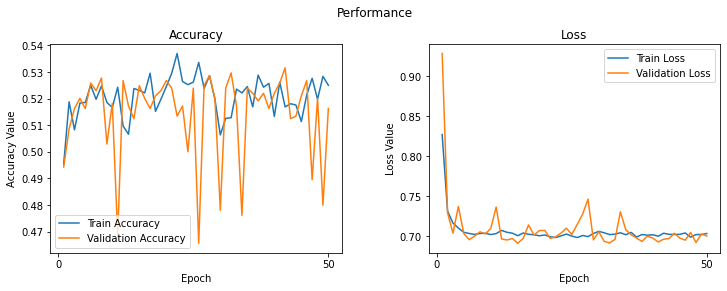

In [16]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,Epoch+1))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, Epoch+1, Epoch))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, Epoch+1, Epoch))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

[[  9 494]
 [ 12 531]]
              precision    recall  f1-score   support

           0       0.43      0.02      0.03       503
           1       0.52      0.98      0.68       543

    accuracy                           0.52      1046
   macro avg       0.47      0.50      0.36      1046
weighted avg       0.48      0.52      0.37      1046



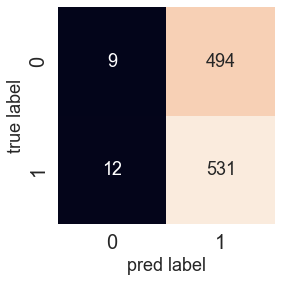

In [20]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred,axis=1)
mat = confusion_matrix(y_test,y_pred)

sns.set(font_scale=1.5)
sns.heatmap(mat,square=True,annot=True,fmt='d',cbar=False)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.xlabel('pred label')
plt.ylabel('true label')

t = ['0','1']
print(mat)
print(classification_report(y_test,y_pred,target_names=t))

## ML

In [21]:
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=12).fit(X_train, y_train) #max_depth=

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.70
Accuracy of Decision Tree classifier on test set: 0.60
